In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AppleSales.csv',index_col='Quarter',parse_dates=True)
df.head()

,Sales
Quarter,
Q2/07,0.270
Q3/07,1.119
Q4/07,2.315
Q1/08,1.703
Q2/08,0.717


In [2]:
isales = df.values

In [3]:
cum_isales = np.cumsum(isales)

In [4]:
cum_isales2 = cum_isales**2

In [5]:
import statsmodels.api as sm
regressor = sm.add_constant(np.column_stack((cum_isales,cum_isales2)))

from statsmodels.api import OLS
model2 = OLS(isales, regressor).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     114.5
Date:                Wed, 19 May 2021   Prob (F-statistic):           1.43e-15
Time:                        21:26:53   Log-Likelihood:                -123.68
No. Observations:                  36   AIC:                             253.4
Df Residuals:                      33   BIC:                             258.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3455      2.179      1.535      0.134      -1.088       7.779
x1             0.1195      0.016      7.691      0.000       0.088       0.151
x2         -6.576e-05   1.83e-05     -3.591      0.001      -0.000   -2.85e-05
==============================================================================
Omnibus:                        6.499   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.022
Skew:                           0.832   Prob(JB):                       0.0812
Kurtosis:                       3.762   Cond. No.                     4.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
b = model2.params

In [7]:
m1 = (-b[1]+np.sqrt(b[1]**2-4*b[0]*b[2]))/(2*b[2])
m2 = (-b[1]-np.sqrt(b[1]**2-4*b[0]*b[2]))/(2*b[2])
m = max(m1,m2)
p = b[0]/m
q = -m*b[2]

In [8]:
print([m, p, q])

[1844.2920473207575, 0.001813974160344104, 0.12127221690106077]


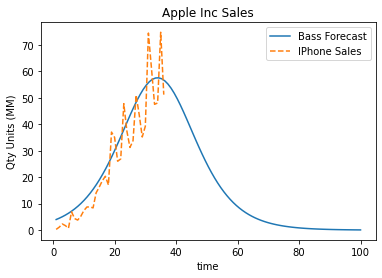

In [9]:
T = 100
t = np.linspace(1,T,T)
FF = m*p*(np.exp((p+q)*t)-1)/(p*np.exp((p+q)*t)+q)
ff = np.diff(FF)

fig, ax = plt.subplots()

ax.plot(np.linspace(1,T,99),ff, label='Bass Forecast')
ax.plot(np.linspace(1,len(isales),len(isales)),isales,'--', label='IPhone Sales')

legend = ax.legend()
ax.set_title('Apple Inc Sales')
ax.set(xlabel='time', ylabel='Qty Units (MM)')

plt.show()